The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


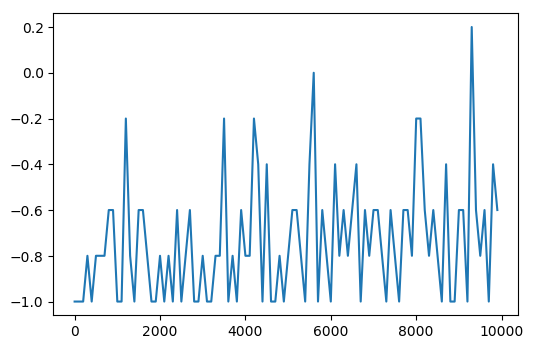

In [5]:
%load_ext autoreload
%autoreload 2
import deeptactoe
import numpy as np
from deeptactoe import game as g
from pprint import pprint as pp
board=g.Board()
player1=g.Player(board,1)
player2=g.Player(board,2,beh='fixed')
board.start_game()
wins=[]
n_ep=10000
for episode in range(n_ep):
	board.clear()
	for i in range(6):
		action=player1.move()		
		player1.update_Q(action)
		player1.update_epsilon(episode)
		board.update(action,1)	
		if(board.get_condition()<4): break	
		player2.Q=player1.Q
		action=player2.move()
		board.update(action,2)		
		if(board.get_condition()<4): break
	if(episode%100==0):
		wins.append(g.run_trial(player1,5))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(0,n_ep,100),wins)


In [16]:
0.9*np.exp(-2e-4*10000)

0.12180175491295143

In [2]:
len(wins)

100